# SOCIAL NETWORK MENTAL DISORDER DETECTION USING MACHINE LEARNING

# WORKING ON TRAIN DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcd()
os.chdir("E:\\PROJECT TRAINING_MAHESH_SIR\PROJECTS\\SOCIAL NETWORK MENTAL DISORDER DETECTION\\")

In [3]:
data=pd.read_excel("train.xlsx")
data.head()

,S no,Name,Course,Age,Gender,Facebook,Youtube,Instagram,Whatsapp,Twitter,Snapchat,Amazon Prime,Netflix,Effects,Effected,Reviews,Unnamed: 16
0,1,Ankitha,btech,21,Female,00:30:00,01:30:00,00:40:00,01:30:00,00:43:00,00:20:00,01:30:00,01:30:00,Addiction,yes,I have been using these social media sites for...,NaN
1,2,Anitha,mtech,23,Female,00:20:00,01:30:00,01:20:00,01:20:00,00:07:00,00:10:00,02:30:00,02:30:00,Anxiety,yes,I think I am the most effected user of these s...,NaN
2,3,Aarav,btech,21,Male,00:10:00,01:10:00,00:20:00,01:10:00,00:05:00,00:05:00,01:40:00,01:40:00,Social awareness,No,Social media help me in getting awareness abou...,NaN
3,4,Arnav,inter,18,Male,00:05:00,01:00:00,00:30:00,01:00:00,00:03:00,00:20:00,02:18:00,02:18:00,shortness of temper,yes,Social media makes us to interact with new peo...,NaN
4,5,Aarthi,btech,24,Female,00:20:00,00:30:00,00:50:00,01:00:00,00:30:00,00:40:00,01:30:00,01:30:00,sleep disorders,yes,I started using these sites long ago.It effect...,NaN


In [4]:
data.drop(["Unnamed: 16"],inplace=True,axis=1)

In [5]:
data.shape

(1000, 16)

In [6]:
data.Effects.value_counts()

Speedy communication             93
Social isolation                 47
life satisfaction                46
Fatigue                          46
Distraction                      44
build relationships              42
Stress                           35
Fomo                             35
posture problems                 35
Empathy                          32
sleep disorders                  30
Happiness                        30
nerves weakness                  29
Save Lives                       27
Building communities             27
Carpal Tunnel Syndrome           27
Social awareness                 27
Connectivity                     25
Shallow breathing                24
Less face time                   24
Addiction                        22
positve downward comparison      20
shortness of temper              19
Anxiety                          19
Increased skills                 18
neckpains                        18
positive upward comparision      17
Vision problems             

In [7]:
data.Effected.value_counts()

yes    590
No     410
Name: Effected, dtype: int64

In [8]:
data.columns

Index(['S no', 'Name', 'Course', ' Age ', 'Gender', 'Facebook', 'Youtube',
       'Instagram', 'Whatsapp', 'Twitter', 'Snapchat', 'Amazon Prime',
       'Netflix', 'Effects', 'Effected', 'Reviews'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S no          1000 non-null   int64 
 1   Name          1000 non-null   object
 2   Course        1000 non-null   object
 3    Age          1000 non-null   int64 
 4   Gender        1000 non-null   object
 5   Facebook      1000 non-null   object
 6   Youtube       1000 non-null   object
 7   Instagram     1000 non-null   object
 8   Whatsapp      1000 non-null   object
 9   Twitter       1000 non-null   object
 10  Snapchat      1000 non-null   object
 11  Amazon Prime  1000 non-null   object
 12  Netflix       1000 non-null   object
 13  Effects       1000 non-null   object
 14  Effected      1000 non-null   object
 15  Reviews       1000 non-null   object
dtypes: int64(2), object(14)
memory usage: 125.1+ KB


In [10]:
data.Course.value_counts()

tenth         129
mba           114
btech         112
inter         102
bbm            99
mtech          97
uneducated     71
pg             63
bba            59
mca            53
ca             41
iim            33
degree         27
Name: Course, dtype: int64

# PREPROCESSING

In [11]:
col=['Facebook', 'Youtube',
       'Instagram', 'Whatsapp', 'Twitter', 'Snapchat', 'Amazon Prime',
       'Netflix']

In [12]:
for c in col:
    print(c,pd.to_datetime(data[c],format='%H:%M:%S', errors='coerce').notnull().sum())

Facebook 1000
Youtube 1000
Instagram 993
Whatsapp 1000
Twitter 1000
Snapchat 1000
Amazon Prime 1000
Netflix 1000


In [13]:
data.loc[~(pd.to_datetime(data['Instagram'],format='%H:%M:%S', errors='coerce').notnull()),'Instagram']='00:00:00'

In [14]:
data.loc[~(pd.to_datetime(data['Instagram'],format='%H:%M:%S', errors='coerce').notnull()),'Instagram']

Series([], Name: Instagram, dtype: object)

In [15]:
for c in col:
    data[c]=pd.to_datetime(data[c],format='%H:%M:%S', errors='ignore')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   S no          1000 non-null   int64         
 1   Name          1000 non-null   object        
 2   Course        1000 non-null   object        
 3    Age          1000 non-null   int64         
 4   Gender        1000 non-null   object        
 5   Facebook      1000 non-null   datetime64[ns]
 6   Youtube       1000 non-null   datetime64[ns]
 7   Instagram     1000 non-null   datetime64[ns]
 8   Whatsapp      1000 non-null   datetime64[ns]
 9   Twitter       1000 non-null   datetime64[ns]
 10  Snapchat      1000 non-null   datetime64[ns]
 11  Amazon Prime  1000 non-null   datetime64[ns]
 12  Netflix       1000 non-null   datetime64[ns]
 13  Effects       1000 non-null   object        
 14  Effected      1000 non-null   object        
 15  Reviews       1000 non-null   object   

In [17]:
for c in col:
    data[c]=data[c].dt.hour*60+data[c].dt.minute

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S no          1000 non-null   int64 
 1   Name          1000 non-null   object
 2   Course        1000 non-null   object
 3    Age          1000 non-null   int64 
 4   Gender        1000 non-null   object
 5   Facebook      1000 non-null   int64 
 6   Youtube       1000 non-null   int64 
 7   Instagram     1000 non-null   int64 
 8   Whatsapp      1000 non-null   int64 
 9   Twitter       1000 non-null   int64 
 10  Snapchat      1000 non-null   int64 
 11  Amazon Prime  1000 non-null   int64 
 12  Netflix       1000 non-null   int64 
 13  Effects       1000 non-null   object
 14  Effected      1000 non-null   object
 15  Reviews       1000 non-null   object
dtypes: int64(10), object(6)
memory usage: 125.1+ KB


In [19]:
data.isna().sum()

S no            0
Name            0
Course          0
 Age            0
Gender          0
Facebook        0
Youtube         0
Instagram       0
Whatsapp        0
Twitter         0
Snapchat        0
Amazon Prime    0
Netflix         0
Effects         0
Effected        0
Reviews         0
dtype: int64

In [20]:
disorder=data.copy()

# DATA MINING OR EDA OR DATA ANALYSIS

<AxesSubplot:>

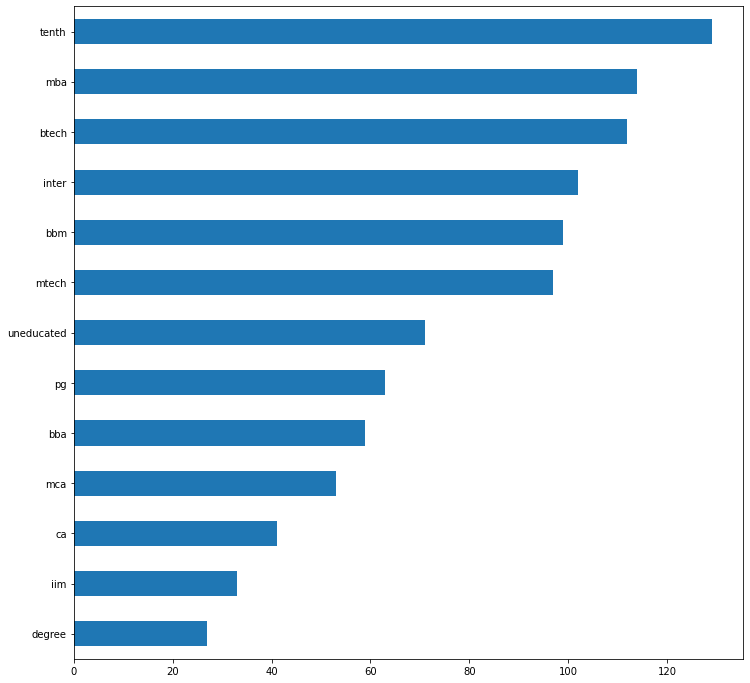

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
data.Course.value_counts().sort_values(ascending=True).plot.barh()

<AxesSubplot:>

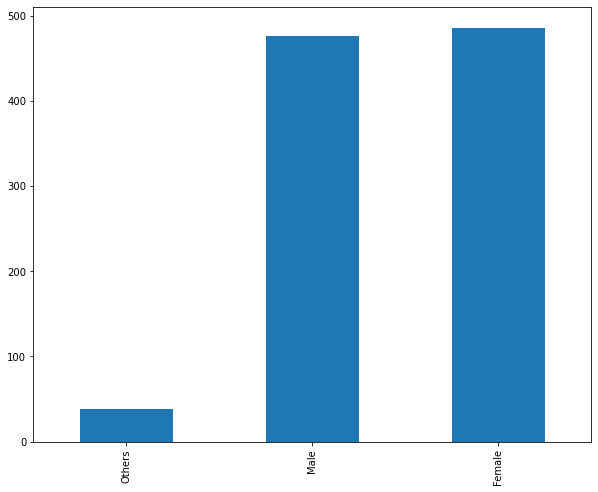

In [22]:
plt.figure(figsize=(10,8))
data.Gender.value_counts().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

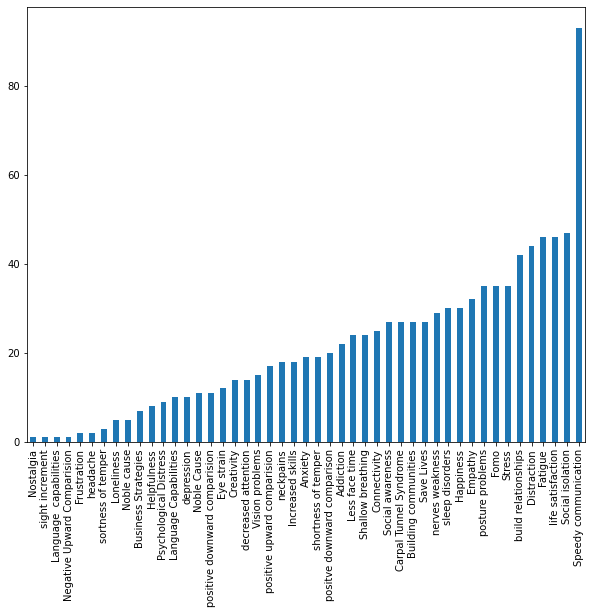

In [23]:
plt.figure(figsize=(10,8))
data.Effects.value_counts().sort_values(ascending=True).plot.bar()

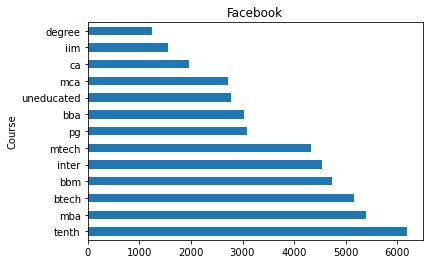

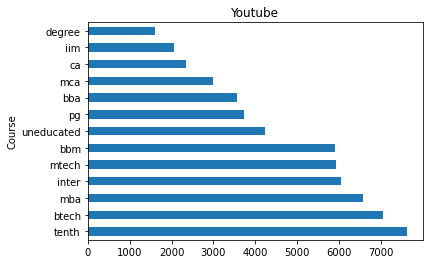

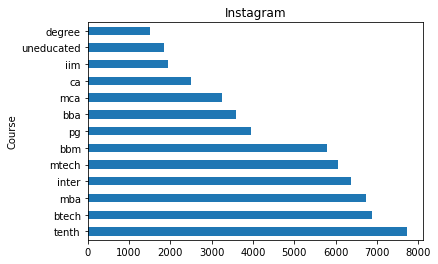

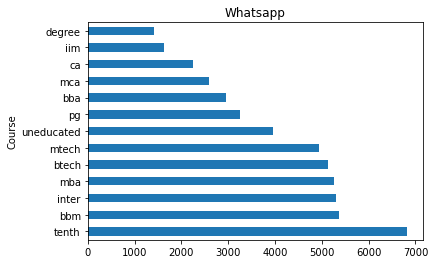

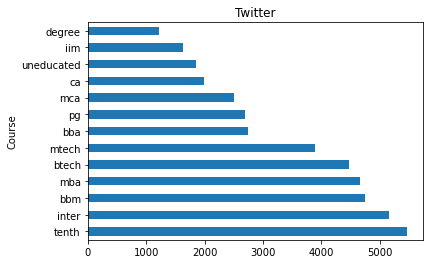

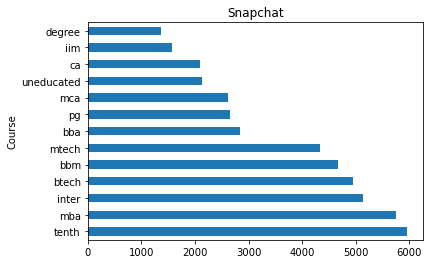

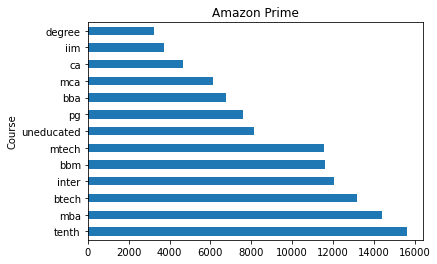

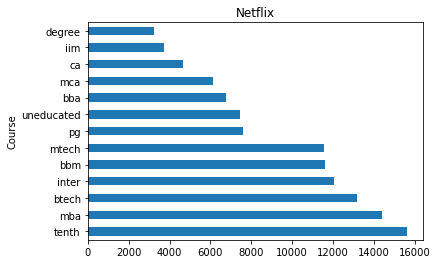

In [24]:
for c in col:
    data.groupby('Course')[c].sum().sort_values(ascending=False).plot.barh()
    plt.title(str(c))
    plt.show()

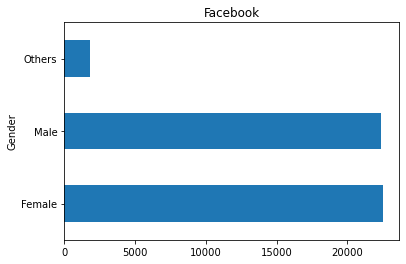

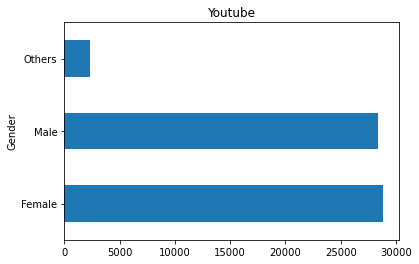

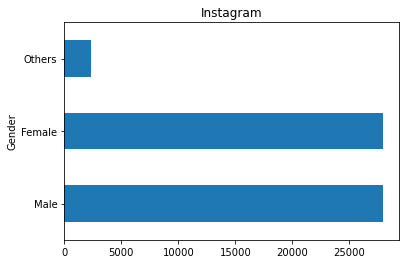

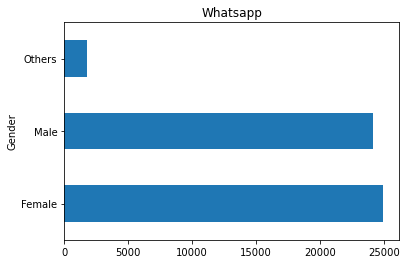

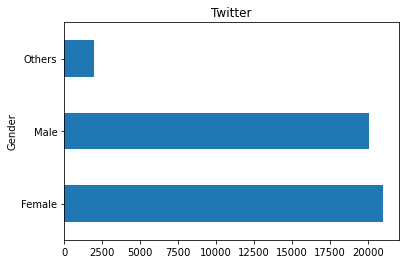

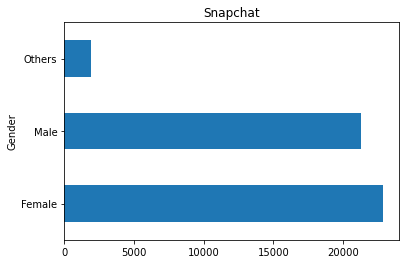

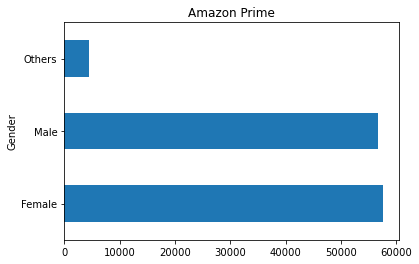

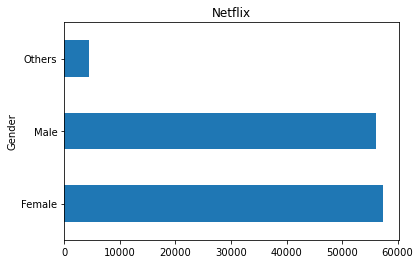

In [25]:
for c in col:
    data.groupby('Gender')[c].sum().sort_values(ascending=False).plot.barh()
    plt.title(str(c))
    plt.show()

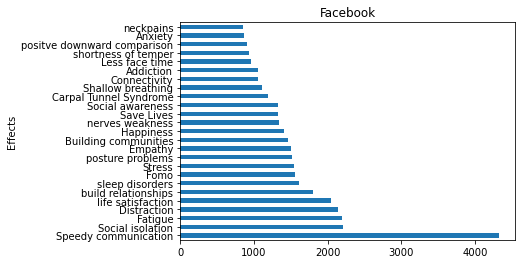

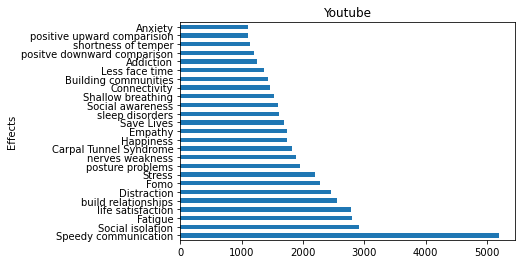

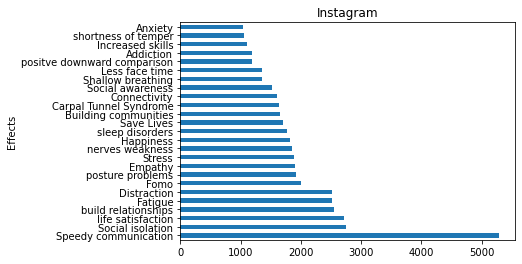

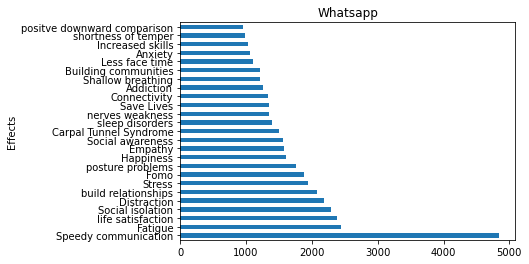

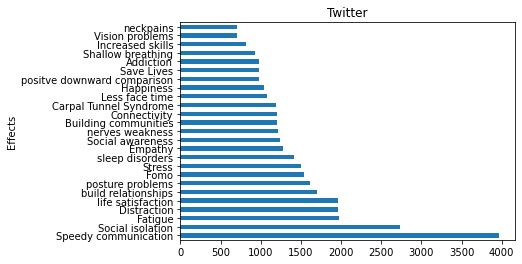

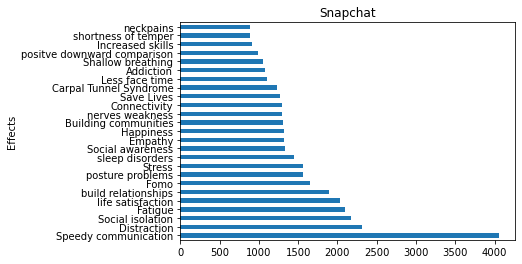

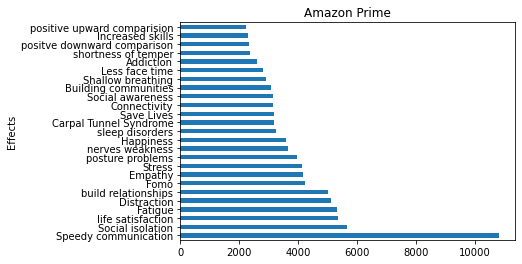

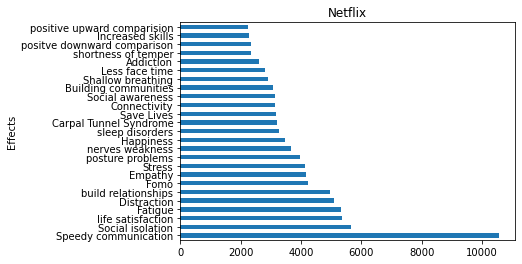

In [26]:
for c in col:
    data.groupby('Effects')[c].sum().sort_values(ascending=False)[:25].plot.barh()
    plt.title(str(c))
    plt.show()

<AxesSubplot:xlabel='Effects'>

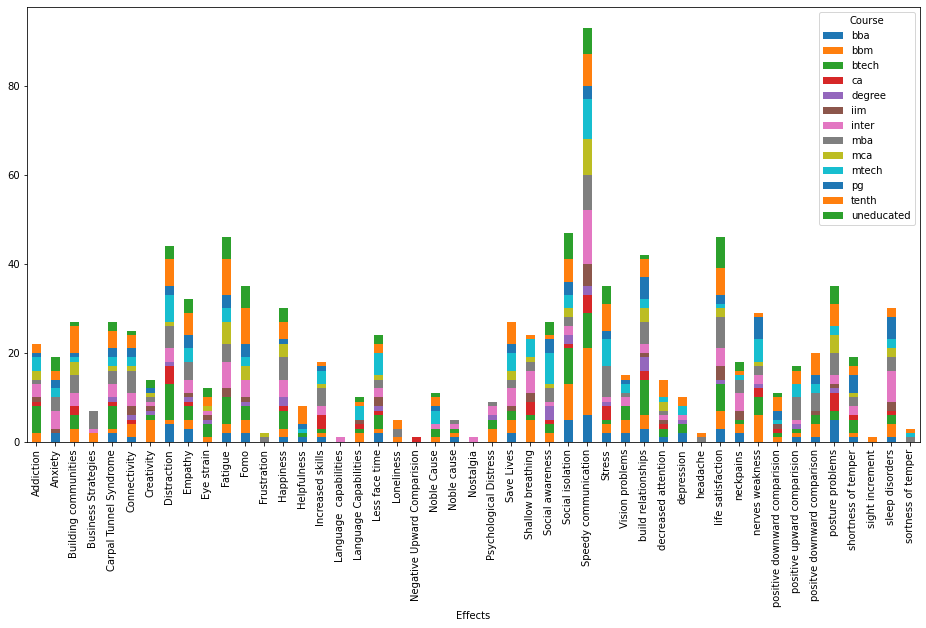

In [27]:
data1 = pd.crosstab(data['Effects'], data['Course'])
data1.plot(kind='bar', stacked=True, figsize = (16,8))

<AxesSubplot:xlabel='Effects'>

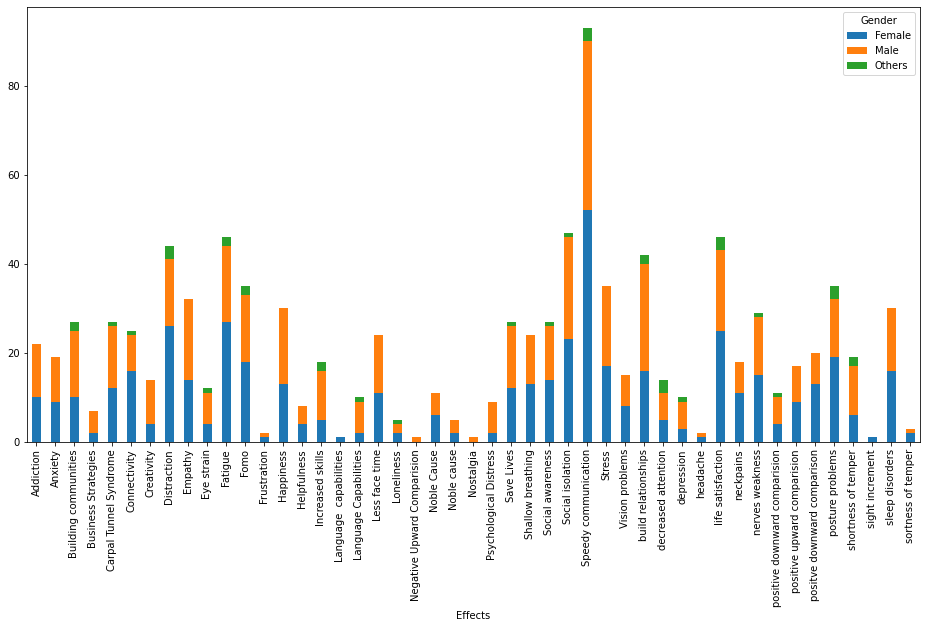

In [28]:
data2 = pd.crosstab(data['Effects'], data['Gender'])
data2.plot(kind='bar', stacked=True, figsize = (16,8))

In [29]:
labels = ["{0} - {1}".format(i, i + 4) for i in range(1, 101, 5)]

In [30]:
data[' Age ']=pd.cut(data[' Age '], range(1, 106, 5), right=False, labels=labels)

<AxesSubplot:xlabel='Effects'>

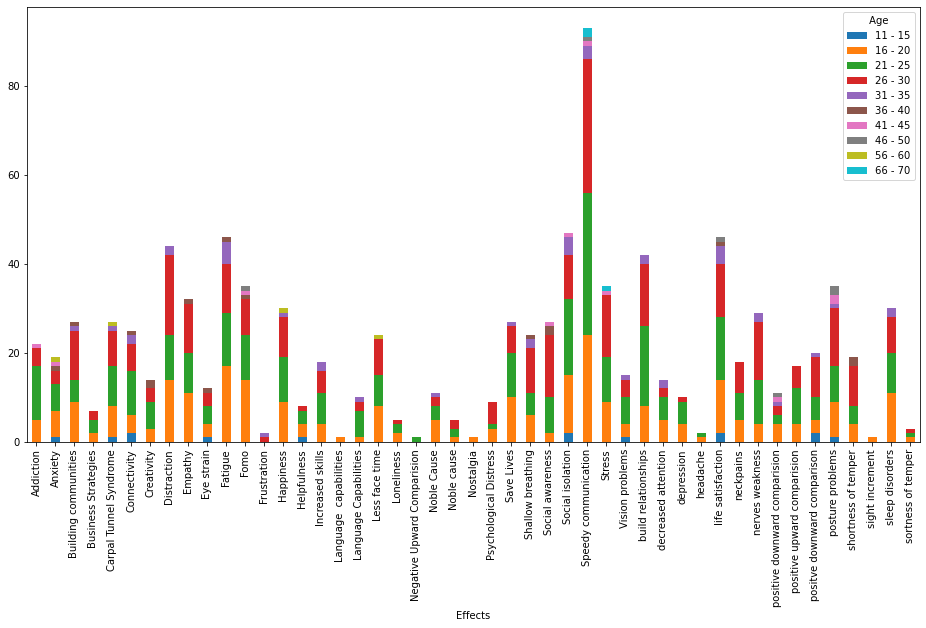

In [31]:
data3 = pd.crosstab(data['Effects'], data[' Age '])
data3.plot(kind='bar', stacked=True, figsize = (16,8))

<AxesSubplot:xlabel='Course'>

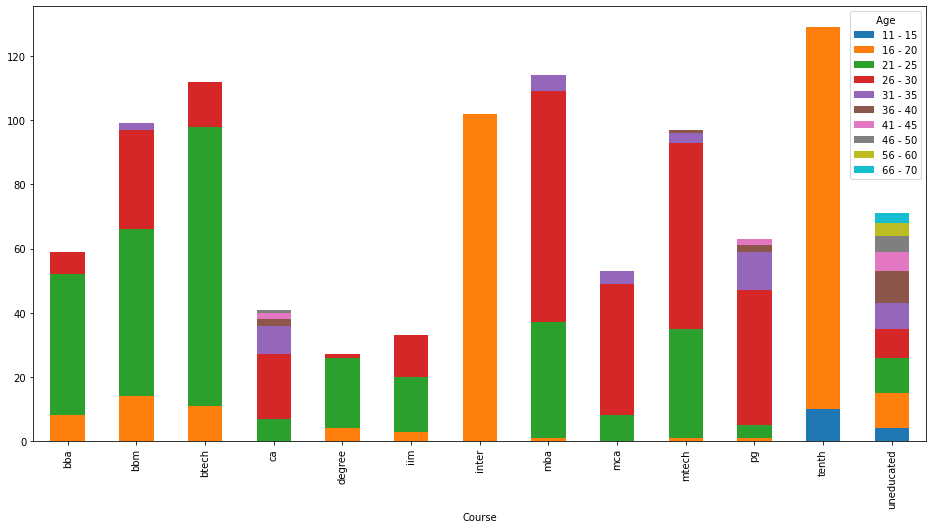

In [32]:
data4 = pd.crosstab(data['Course'], data[' Age '])
data4.plot(kind='bar', stacked=True, figsize = (16,8))

<AxesSubplot:xlabel='Gender'>

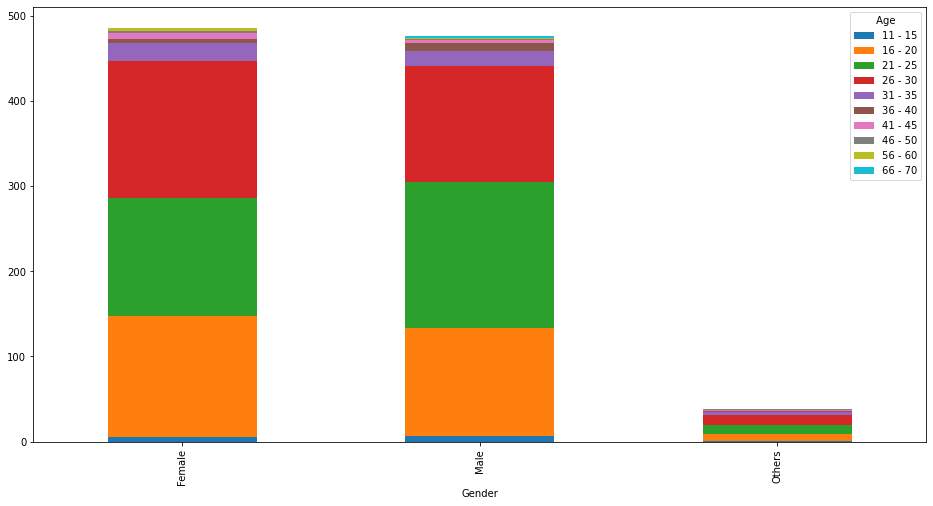

In [33]:
data5 = pd.crosstab(data['Gender'], data[' Age '])
data5.plot(kind='bar', stacked=True, figsize = (16,8))

# WORKING ON NATURAL PROCESSING 

In [34]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [35]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHIVA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHIVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
tk=TweetTokenizer()
ps = PorterStemmer()
lem=WordNetLemmatizer()
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s=s.lower()
    s=tk.tokenize(s)
    s=[ps.stem(word) for word in s if not word in set(stopwords.words('english'))]
    s=[lem.lemmatize(word) for word in s]
    s= ' '.join(s)
    return s



disorder['content'] = [cleaning(s) for s in disorder['Reviews']]

In [37]:
disorder['content']

0      use social medium site year got addict though ...
1      think effect user social medium sight worri po...
2      social medium help get awar te sensit issu dis...
3      social medium make u interact new peopl far aw...
4      start use site long ago effect health lot cant...
                             ...                        
995    addict websit sinc uneduc help well websit att...
996    friend real life throug social medium met mani...
997    posit downward mparis social medium sinc use p...
998    inter student increas skill use socail medium ...
999    help build relationship also relationship caus...
Name: content, Length: 1000, dtype: object

In [38]:
all_words = ' '.join([text for text in disorder['content']])

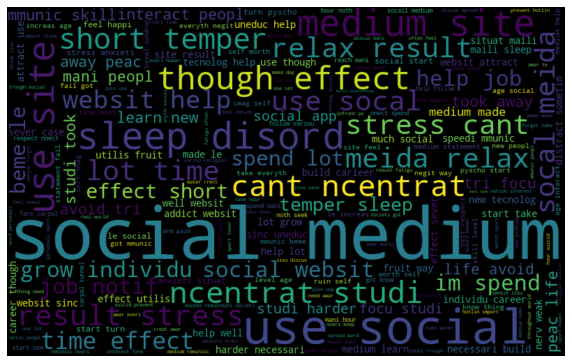

In [41]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="black").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

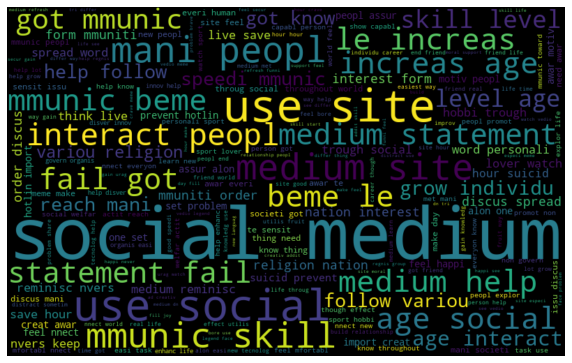

In [42]:
normal_words =' '.join([text for text in disorder['content'][disorder['Effected'] == 'No']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

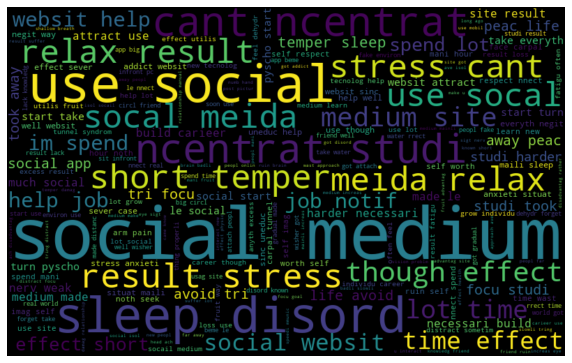

In [43]:
negative_words =' '.join([text for text in disorder['content'][disorder['Effected'] == 'yes']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
def most_repeated(x):
    words = []
    for i in x:
        wd =re.findall(r'\w+', i)
        words.append(wd)
    return words

In [45]:
WD_regular = most_repeated(disorder['content'][disorder['Effected'] == 'No'])

WD_negative = most_repeated(disorder['content'][disorder['Effected'] == 'yes'])

In [46]:
WD_regular = sum(WD_regular,[])
WD_negative = sum(WD_negative,[])

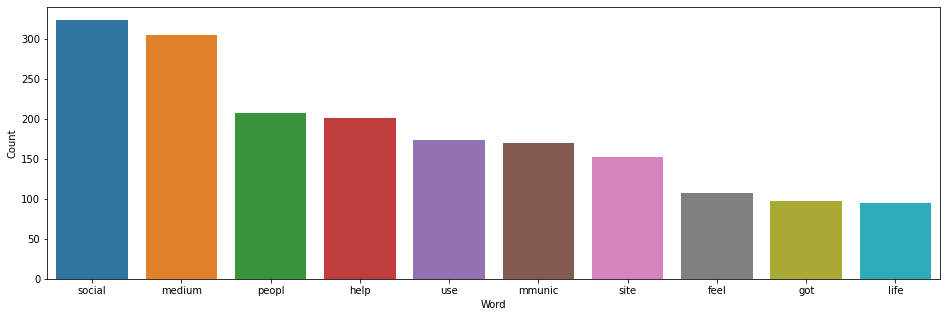

In [47]:
import seaborn as sns

a = nltk.FreqDist(WD_regular)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

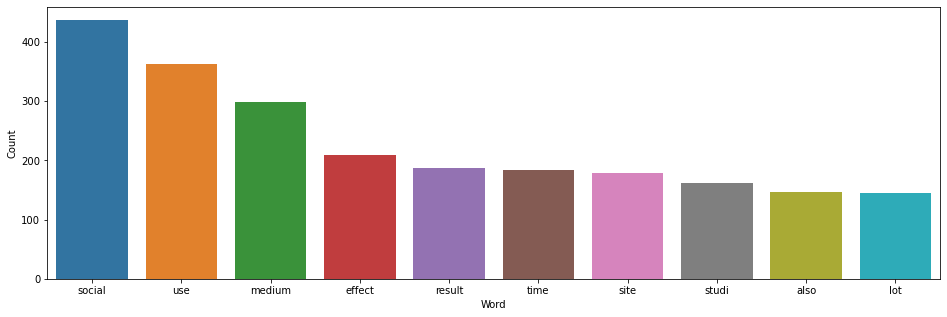

In [48]:
b = nltk.FreqDist(WD_negative)
e = pd.DataFrame({'Word': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Word", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [49]:
disorder.drop(['S no','Name',' Age ','Reviews','content'],inplace=True,axis=1)

In [50]:
disorder["Course"]=disorder["Course"].map({"tenth": 0, "mba":1,"btech": 2,"inter": 3,"bbm": 4,
                                                                "mtech": 5,"uneducated": 6,"pg": 7,
                                                                "bba": 8,"mca": 9,"ca": 10,
                                                                 "iim": 11,"degree": 12})

In [51]:
disorder["Gender"]=disorder["Gender"].map({"Female": 0, "Male":1, "Others":2})

In [52]:
disorder["Effects"]=disorder["Effects"].map({"Speedy communication": 0, "Social isolation":1,"Fatigue": 2,"life satisfaction": 3,"Distraction": 4,
                                            "build relationships": 5,"posture problems": 6,"Stress": 7,
                                            "Fomo": 8,"Empathy": 9,"Happiness": 10,
                                            "sleep disorders": 11,"nerves weakness": 12,
                                            "Carpal Tunnel Syndrome": 13,"Save Lives": 14,"Building communities": 15,
                                            "Social awareness": 16,"Connectivity": 17,"Less face time": 18,
                                            "Shallow breathing": 19,"Addiction": 20,"positve downward comparison": 21,
                                            "Anxiety": 22,"shortness of temper": 23,
                                            "neckpains": 24,"Increased skills": 25,"positive upward comparision":26,
                                            "Vision problems":27,"decreased attention":28,"Creativity":29,
                                            "Eye strain":30,"positive downward comparision":31,"Noble Cause":32,"Language Capabilities":33,
                                            "depression":34,"Psychological Distress":35,"Helpfulness":36,"Business Strategies":37,
                                            "Loneliness":38,"Noble cause":39,"sortness of temper":40,"headache":41,"Frustration":42,
                                            "Nostalgia":43,"Negative Upward Comparision":44,"sight increment":45,"Language  capabilities":46})

In [53]:
disorder["Effected"]=disorder["Effected"].map({"No": 0, "yes":1})

In [54]:
y = disorder.Effected.values
y

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [55]:
disorder.drop(["Effected"],inplace=True,axis=1)

In [56]:
x = disorder.values

In [57]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# RANDOM FOREST ALGORITHM

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 500)

clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [78]:
clf.score(x_train,y_train)

1.0

In [ ]:
clf.score(x_test,y_test)

In [80]:
y_predict=clf.predict(x_test)
y_predict#predicted values

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [81]:
y_test#actual values

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(confusion_matrix(y_test, y_predict).T, index=clf.classes_,columns=clf.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        0    1
Predicted         
0          49    7
1          58  136


In [84]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.46      0.60       107
           1       0.70      0.95      0.81       143

    accuracy                           0.74       250
   macro avg       0.79      0.70      0.70       250
weighted avg       0.78      0.74      0.72       250



# WORKING ON TEST DATA

In [108]:
test=pd.read_excel("test.xlsx")
test.head()

,S no,Name,Course,Age,Gender,Facebook,Youtube,Instagram,Whatsapp,Twitter,Snapchat,Amazon Prime,Netflix,Effects,Reviews,Unnamed: 15
0,1,Sachi,mtech,25,Female,00:56:00,01:10:00,00:30:00,01:30:00,00:42:00,00:54:00,01:40:00,01:40:00,Addiction,I have been using these social media sites for...,NaN
1,2,Saanvi,pg,27,Female,01:05:00,01:00:00,00:50:00,01:00:00,00:28:00,01:31:00,02:18:00,02:18:00,Anxiety,I think I am the most effected user of these s...,NaN
2,3,Sadhvi,mba,26,Female,01:27:00,00:30:00,01:10:00,01:00:00,00:32:00,00:43:00,01:30:00,01:30:00,headache,I spend most of my time on social media and su...,NaN
3,4,Saguna,mca,29,Female,01:22:00,00:20:00,01:10:00,01:30:00,00:38:00,01:18:00,00:50:00,00:50:00,shortness of temper,Social media makes us to interact with new peo...,NaN
4,5,Sajni,degree,22,Female,00:45:00,01:20:00,01:00:00,01:10:00,00:40:00,01:16:00,01:34:00,01:34:00,sleep disorders,I started using these sites long ago.It effect...,NaN


In [109]:
test.drop(["Unnamed: 15"],inplace=True,axis=1)

In [110]:
test.shape

(300, 15)

In [111]:
test.isnull().sum()

S no            0
Name            0
Course          0
Age             0
Gender          0
Facebook        0
Youtube         0
Instagram       0
Whatsapp        0
Twitter         0
Snapchat        0
Amazon Prime    0
Netflix         0
Effects         0
Reviews         0
dtype: int64

In [112]:
col=['Facebook', 'Youtube',
       'Instagram', 'Whatsapp', 'Twitter', 'Snapchat', 'Amazon Prime',
       'Netflix']

In [113]:
for c in col:
    print(c,pd.to_datetime(test[c],format='%H:%M:%S', errors='coerce').notnull().sum())

Facebook 300
Youtube 300
Instagram 297
Whatsapp 300
Twitter 300
Snapchat 300
Amazon Prime 300
Netflix 300


In [114]:
test.loc[~(pd.to_datetime(test['Instagram'],format='%H:%M:%S', errors='coerce').notnull()),'Instagram']='00:00:00'

In [115]:
test.loc[~(pd.to_datetime(test['Instagram'],format='%H:%M:%S', errors='coerce').notnull()),'Instagram']

Series([], Name: Instagram, dtype: object)

In [116]:
for c in col:
    test[c]=pd.to_datetime(test[c],format='%H:%M:%S', errors='ignore')

In [117]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   S no          300 non-null    int64         
 1   Name          300 non-null    object        
 2   Course        300 non-null    object        
 3   Age           300 non-null    int64         
 4   Gender        300 non-null    object        
 5   Facebook      300 non-null    datetime64[ns]
 6   Youtube       300 non-null    datetime64[ns]
 7   Instagram     300 non-null    datetime64[ns]
 8   Whatsapp      300 non-null    datetime64[ns]
 9   Twitter       300 non-null    datetime64[ns]
 10  Snapchat      300 non-null    datetime64[ns]
 11  Amazon Prime  300 non-null    datetime64[ns]
 12  Netflix       300 non-null    datetime64[ns]
 13  Effects       300 non-null    object        
 14  Reviews       300 non-null    object        
dtypes: datetime64[ns](8), int64(2), object(5

In [118]:
for c in col:
    test[c]=test[c].dt.hour*60+test[c].dt.minute

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S no          300 non-null    int64 
 1   Name          300 non-null    object
 2   Course        300 non-null    object
 3   Age           300 non-null    int64 
 4   Gender        300 non-null    object
 5   Facebook      300 non-null    int64 
 6   Youtube       300 non-null    int64 
 7   Instagram     300 non-null    int64 
 8   Whatsapp      300 non-null    int64 
 9   Twitter       300 non-null    int64 
 10  Snapchat      300 non-null    int64 
 11  Amazon Prime  300 non-null    int64 
 12  Netflix       300 non-null    int64 
 13  Effects       300 non-null    object
 14  Reviews       300 non-null    object
dtypes: int64(10), object(5)
memory usage: 35.3+ KB


In [120]:
test["Effects"]=test["Effects"].map({"Speedy communication": 0, "Social isolation":1,"Fatigue": 2,"life satisfaction": 3,"Distraction": 4,
                                            "build relationships": 5,"posture problems": 6,"Stress": 7,
                                            "Fomo": 8,"Empathy": 9,"Happiness": 10,
                                            "sleep disorders": 11,"nerves weakness": 12,
                                            "Carpal Tunnel Syndrome": 13,"Save Lives": 14,"Building communities": 15,
                                            "Social awareness": 16,"Connectivity": 17,"Less face time": 18,
                                            "Shallow breathing": 19,"Addiction": 20,"positve downward comparison": 21,
                                            "Anxiety": 22,"shortness of temper": 23,
                                            "neckpains": 24,"Increased skills": 25,"positive upward comparision":26,
                                            "Vision problems":27,"decreased attention":28,"Creativity":29,
                                            "Eye strain":30,"positive downward comparision":31,"Noble Cause":32,"Language Capabilities":33,
                                            "depression":34,"Psychological Distress":35,"Helpfulness":36,"Business Strategies":37,
                                            "Loneliness":38,"Noble cause":39,"sortness of temper":40,"headache":41,"Frustration":42,
                                            "Nostalgia":43,"Negative Upward Comparision":44,"sight increment":45,"Language  capabilities":46})

In [121]:
test=test.dropna()

In [122]:
test.shape

(294, 15)

In [123]:
test_Name=test.Name

In [124]:
test_Course=test.Course

In [125]:
test_Reviews=test.Reviews

In [126]:
test.drop(['S no','Name','Age','Reviews'],inplace=True,axis=1)

In [127]:
test["Course"]=test["Course"].map({"tenth": 0, "mba":1,"btech": 2,"inter": 3,"bbm": 4,
                                                                "mtech": 5,"uneducated": 6,"pg": 7,
                                                                "bba": 8,"mca": 9,"ca": 10,
                                                                 "iim": 11,"degree": 12})

In [128]:
test["Gender"]=test["Gender"].map({"Female": 0, "Male":1, "Others":2})

In [129]:
disorder.columns

Index(['Course', 'Gender', 'Facebook', 'Youtube', 'Instagram', 'Whatsapp',
       'Twitter', 'Snapchat', 'Amazon Prime', 'Netflix', 'Effects'],
      dtype='object')

In [130]:
test.columns

Index(['Course', 'Gender', 'Facebook', 'Youtube', 'Instagram', 'Whatsapp',
       'Twitter', 'Snapchat', 'Amazon Prime', 'Netflix', 'Effects'],
      dtype='object')

In [131]:
list((disorder.columns==test.columns))

[True, True, True, True, True, True, True, True, True, True, True]

In [132]:
clf.predict(test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [133]:
submission_predict=clf.predict(test)

In [134]:
submission=pd.DataFrame(data = {'Name':test_Name,'Course':test_Course,'Reviews':test_Reviews,'disorder':submission_predict})

In [135]:
submission["disorder"]=submission["disorder"].map({1: "yes", 0: "No"})

In [136]:
submission.to_csv('Sample_Submission.csv',index = False)